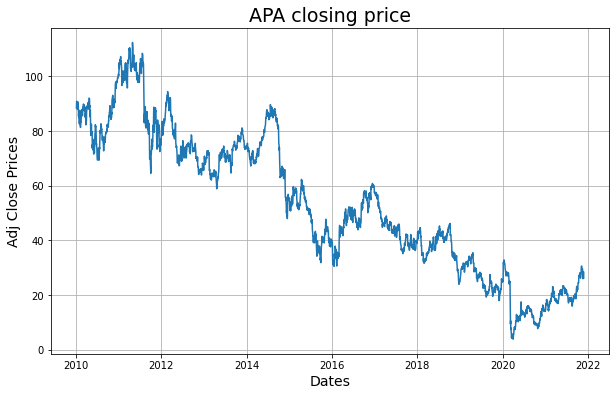

------------------------------------------------------------------------------------------------------------------------------------------------------


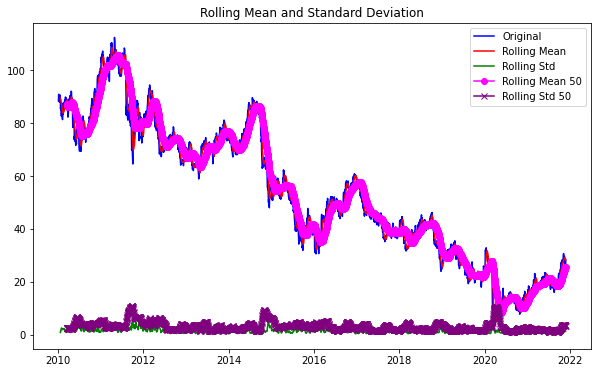

Results of dickey fuller test
Test Statistics                  -1.476722
p-value                           0.544994
No. of lags used                  6.000000
Number of observations used    2990.000000
critical value (1%)              -3.432539
critical value (5%)              -2.862507
critical value (10%)             -2.567285
dtype: float64
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
APA's Adj Close is not stationary, and the suggest d for arima is 0
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

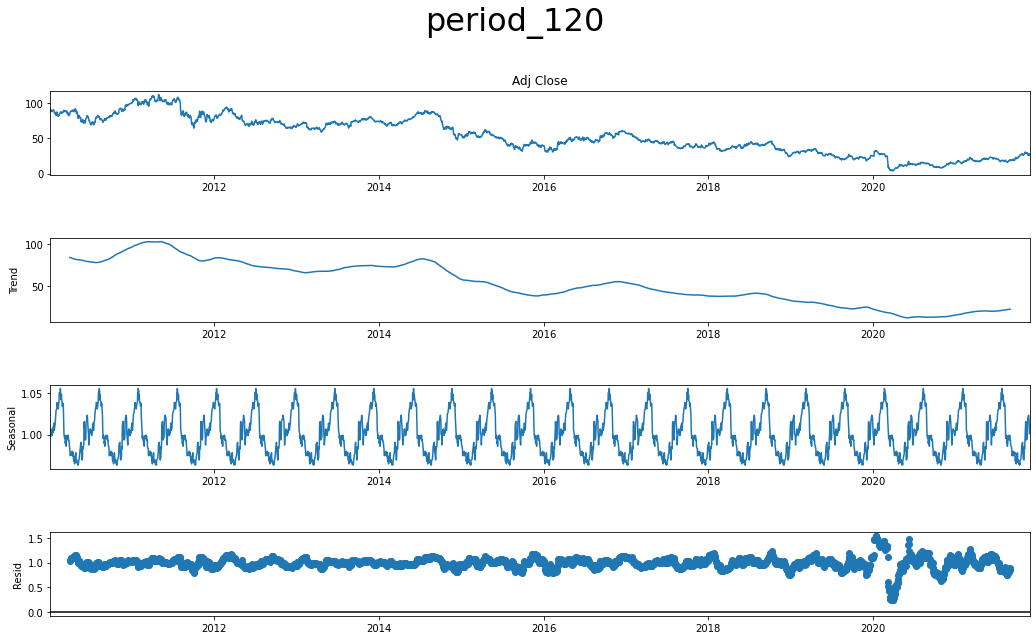

------------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


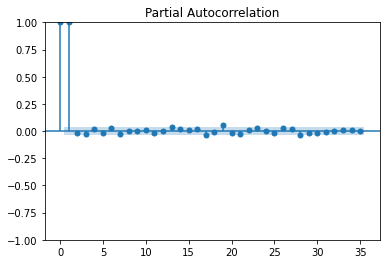

------------------------------------------------------------------------------------------------------------------------------------------------------


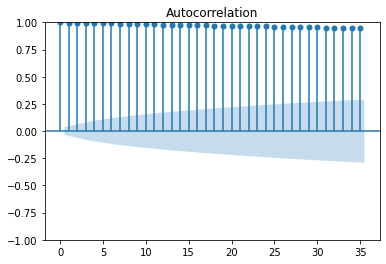

------------------------------------------------------------------------------------------------------------------------------------------------------
time: 9.16 s (started: 2022-01-08 04:40:40 +00:00)


In [1]:
from eda import EDA
from preprocessing import GetData, Prep
from pathlib import Path
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

get_data = GetData(Path('./dataset'))
obj_ticker = 'APA'
price_type = 'Adj Close'

apa_price_df = get_data.get_price_data(price_type=price_type, ticker_list=[obj_ticker])

apa_eda = EDA(apa_price_df, obj_ticker, price_type)
apa_eda.draw_ori_price()
print("-"*150)
apa_eda.test_stationarity()
print("-"*150)
apa_eda.seasonal_decompose(120)
print("-"*150)
apa_eda.draw_pacf(0)
print("-"*150)
apa_eda.draw_acf(0)
print("-"*150)

Now use log-transform on Adj Close to make it has stationarity


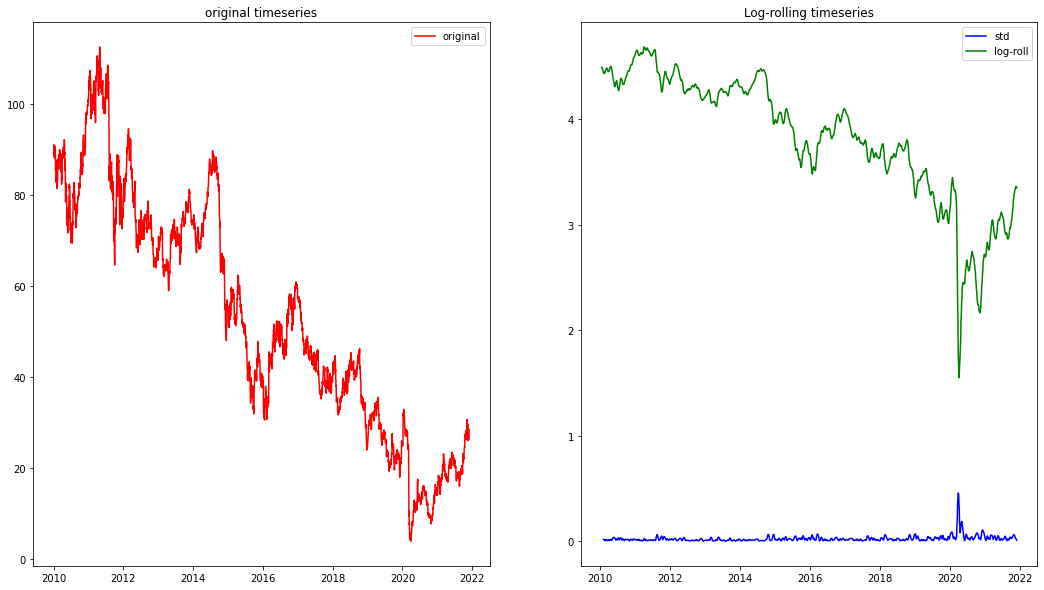

------------------------------------------------------------------------------------------------------------------------------------------------------


2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2021-11-19    3.357966
2021-11-22    3.355949
2021-11-23    3.358088
2021-11-24    3.356924
2021-11-26    3.347598
Name: Adj Close, Length: 2997, dtype: float64

time: 231 ms (started: 2022-01-08 04:40:49 +00:00)


In [2]:
prep = Prep()
log_apa_price = prep.log_rolling(apa_price_df[price_type], period=14)
print("-"*150)
display(log_apa_price)

Now check if input data has null:
    null rate :  0.004337671004337671


2010-01-04    4.489497
2010-01-05    4.489497
2010-01-06    4.489497
2010-01-07    4.489497
2010-01-08    4.489497
                ...   
2021-11-19    3.357966
2021-11-22    3.355949
2021-11-23    3.358088
2021-11-24    3.356924
2021-11-26    3.347598
Name: Adj Close, Length: 2997, dtype: float64

Now check if input data has null:
    null rate :  0.0


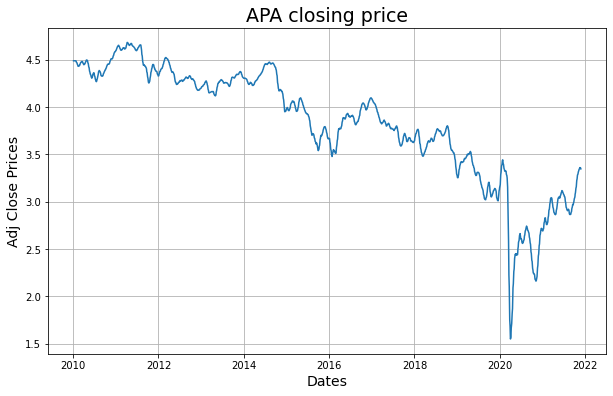

------------------------------------------------------------------------------------------------------------------------------------------------------


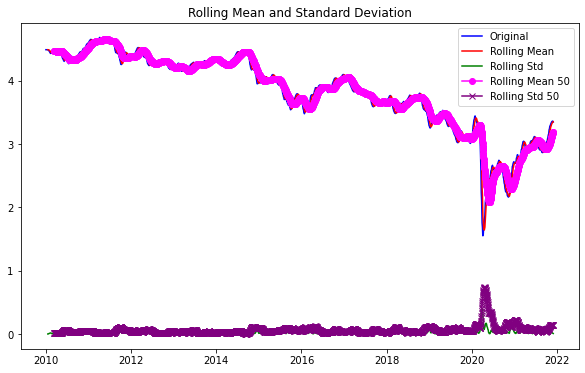

Results of dickey fuller test
Test Statistics                  -1.779539
p-value                           0.390666
No. of lags used                 29.000000
Number of observations used    2967.000000
critical value (1%)              -3.432556
critical value (5%)              -2.862515
critical value (10%)             -2.567289
dtype: float64
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
APA's Adj Close is not stationary, and the suggest d for arima is 1
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

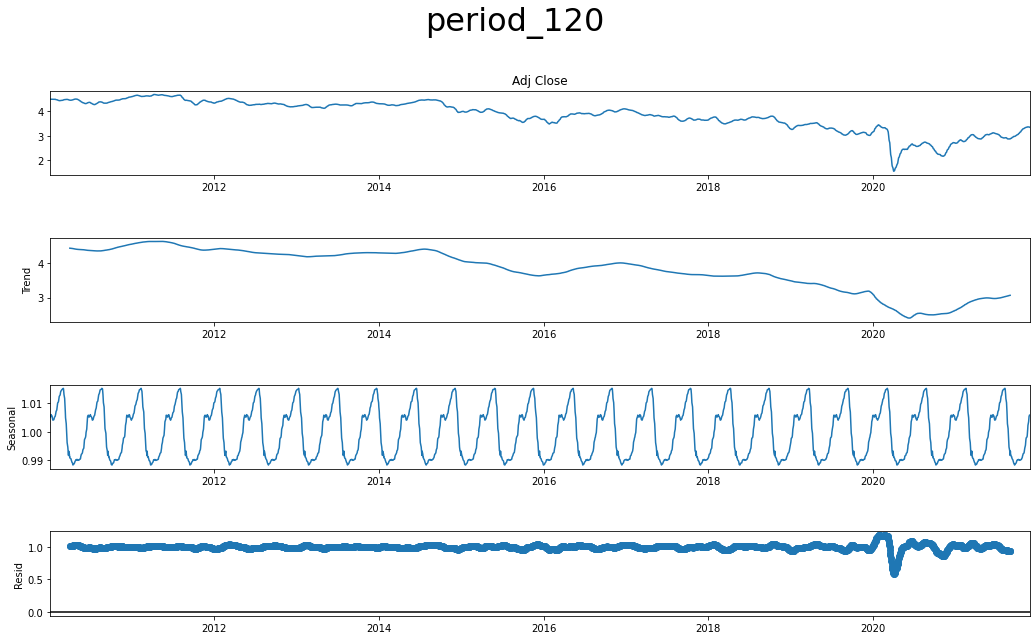

------------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


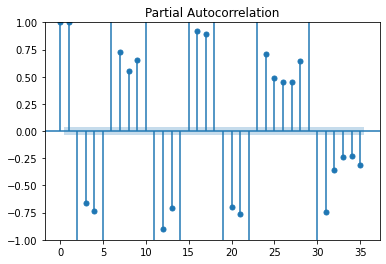

------------------------------------------------------------------------------------------------------------------------------------------------------


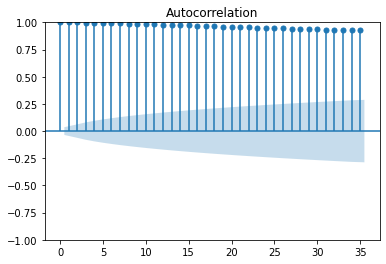

------------------------------------------------------------------------------------------------------------------------------------------------------
time: 747 ms (started: 2022-01-08 04:40:49 +00:00)


In [3]:
log_apa_price = prep.deal_null(log_apa_price, fill=True, fill_method="bfill")
display(log_apa_price)
log_apa_price = prep.deal_null(log_apa_price)

log_apa_df = pd.DataFrame(log_apa_price, columns=[price_type])
log_apa_eda = EDA(log_apa_df, obj_ticker, price_type)
log_apa_eda.draw_ori_price()
print("-"*150)
log_apa_eda.test_stationarity()
print("-"*150)
log_apa_eda.seasonal_decompose(120)
print("-"*150)
log_apa_eda.draw_pacf(0)
print("-"*150)
log_apa_eda.draw_acf(0)
print("-"*150)

In [4]:
test_len = 50

# 過去資料
train_data = log_apa_price[:-test_len]
# 正確答案
test_data = log_apa_price[-test_len:]

# train_data = apa_price_df[price_type][:-test_len]
# test_data = apa_price_df[price_type][-test_len:]
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18315.494, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-25231.968, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-21275.954, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18310.738, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-25249.679, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-25278.731, Time=0.34 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-25287.544, Time=0.35 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-25288.270, Time=0.65 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-25326.418, Time=0.82 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-25332.451, Time=0.89 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=-25341.459, Time=1.06 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=-25352.548, Time=1.44 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=-25366.801, Time=1.20 sec
 ARIMA(10,1,1)(0,0,0)[0] intercept   : AIC=-25341.043, Time=1.76 sec
 AR

In [5]:
# 建立模型
model = ARIMA(train_data, order=(3, 0, 2))  
fitted = model.fit()  
print(fitted.summary())
# 模型預測
fc= fitted.forecast(steps=len(test_data), alpha=0.05)  # 95% confidence

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2947
Model:                 ARIMA(3, 0, 2)   Log Likelihood               12662.077
Date:                Sat, 08 Jan 2022   AIC                         -25310.155
Time:                        04:41:04   BIC                         -25268.235
Sample:                             0   HQIC                        -25295.062
                               - 2947                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8351      0.328     11.700      0.000       3.193       4.478
ar.L1          2.6608      0.030     89.939      0.000       2.603       2.719
ar.L2         -2.3481      0.057    -40.978      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


MSE: 16.362673218826885, R2: -0.5659850824780199


,test,prediction
test,1.000000,0.905598
prediction,0.905598,1.000000


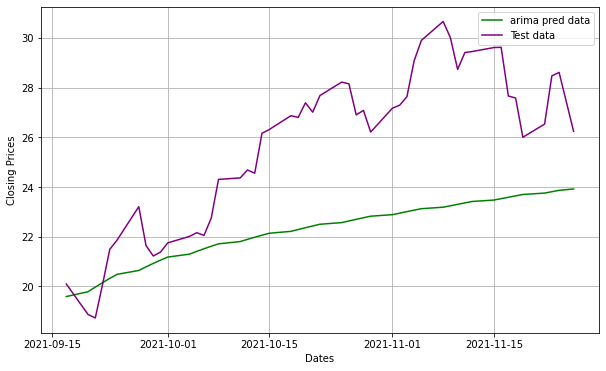

time: 95 ms (started: 2022-01-08 04:41:04 +00:00)


In [6]:
ori_test_data = apa_price_df[price_type][-test_len:]
pred = pd.Series(np.exp(fc).values, index=ori_test_data.index)
# pred = pd.Series(fc.values, index=ori_test_data.index)
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(pred, 'green', label='arima pred data')
plt.plot(ori_test_data, 'purple', label='Test data')
plt.legend()

mse = mean_squared_error(ori_test_data, pred)
r2_s = r2_score(ori_test_data, pred) 
corr_df = pd.DataFrame({"test":ori_test_data, "prediction":pred})
print(f'MSE: {mse}, R2: {r2_s}')
display(corr_df.corr())
plt.show()